# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/background_scores/*/*.h5" 
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(format_io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)

In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6

# General scores distribution

Text(0.5, 1.0, 'General distributions of SCD scores *n=2205*')

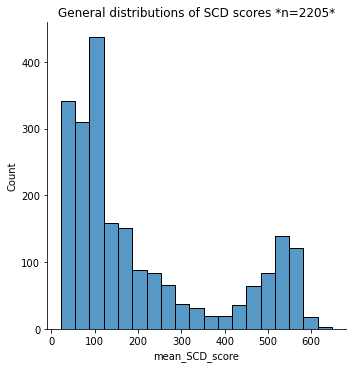

In [4]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")

# shuffle parameter effect exploration

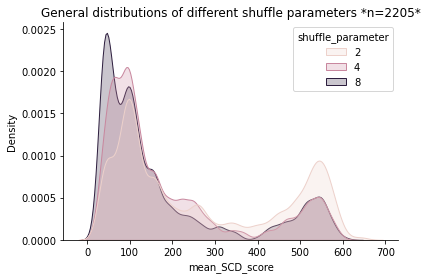

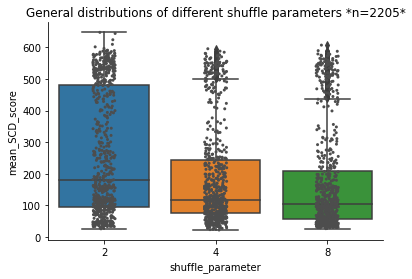

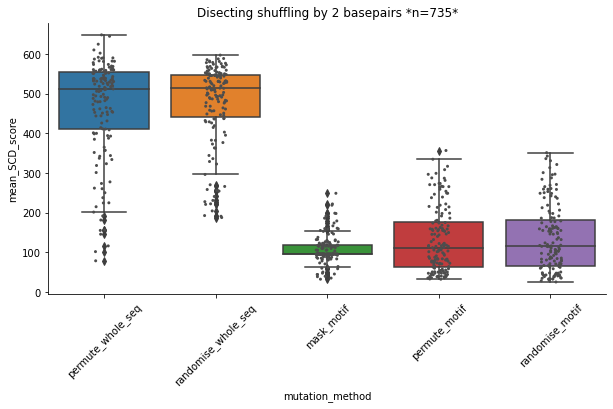

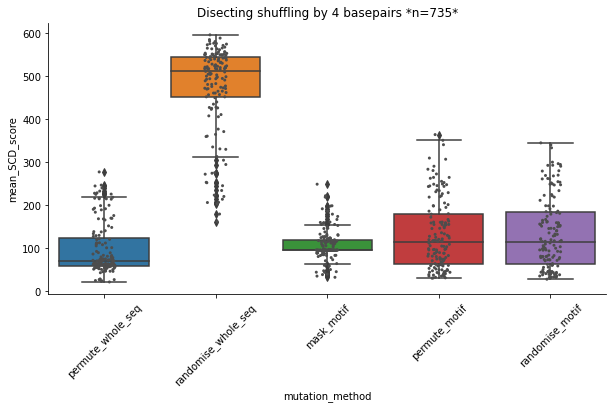

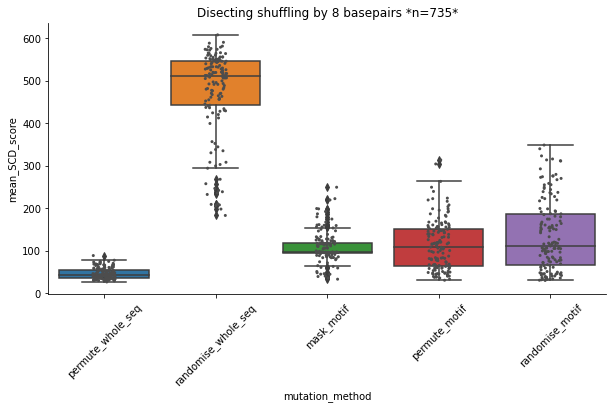

In [5]:
sns.color_palette("tab10")
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="shuffle_parameter", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='shuffle_parameter', y="mean_SCD_score")
sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
for score in [2,4,8]:
    df_dummy_parameter = dfs.loc[dfs["shuffle_parameter"]==score]
    plt.figure(figsize=(10,5)) # ,dpi=200
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# map threshold effect exploration

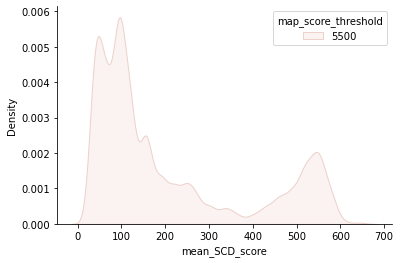

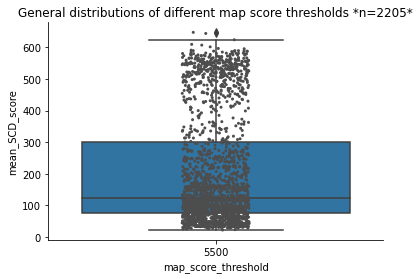

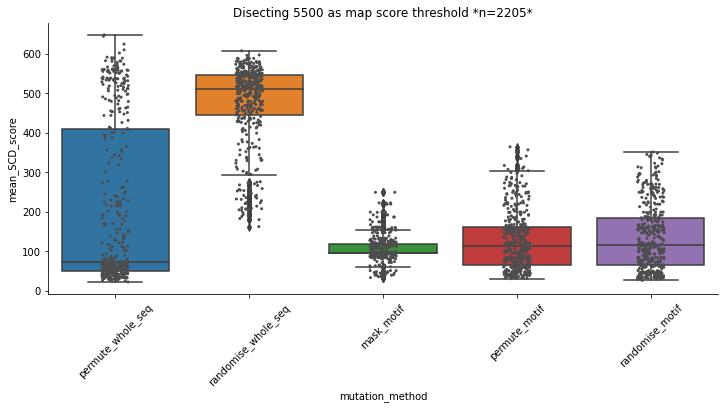

In [6]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="map_score_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='map_score_threshold', y="mean_SCD_score")
sns.stripplot(x="map_score_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different map score thresholds *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
for score in [5500]:
    df_dummy_parameter = dfs.loc[dfs["map_score_threshold"]==score]
    plt.figure(figsize=(12,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} as map score threshold *n={df_dummy_parameter.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# ctcf selection threshold effect exploration

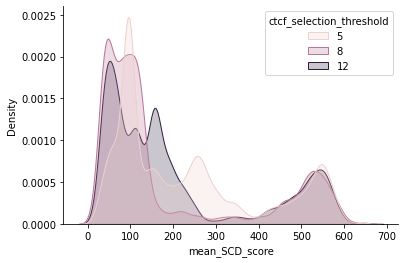

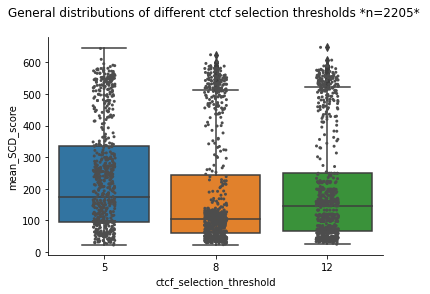

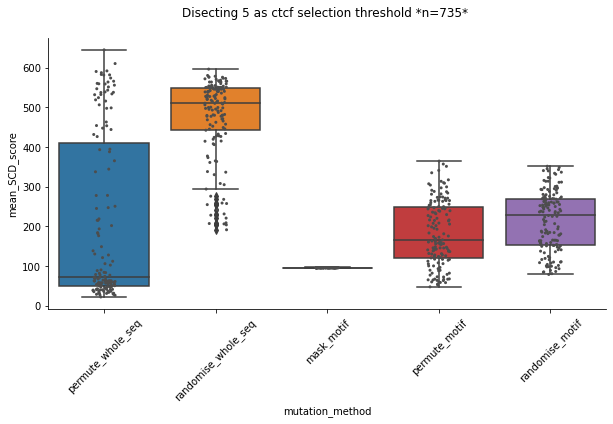

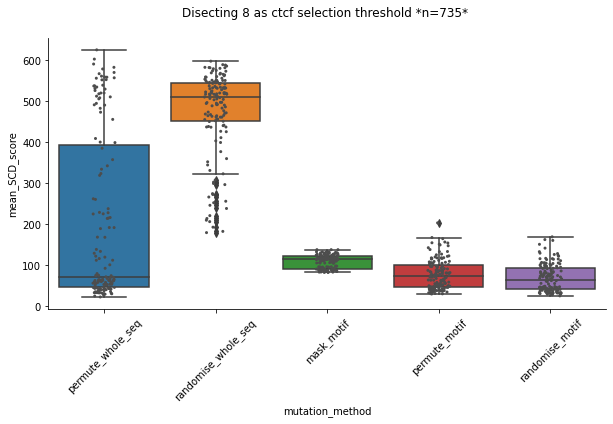

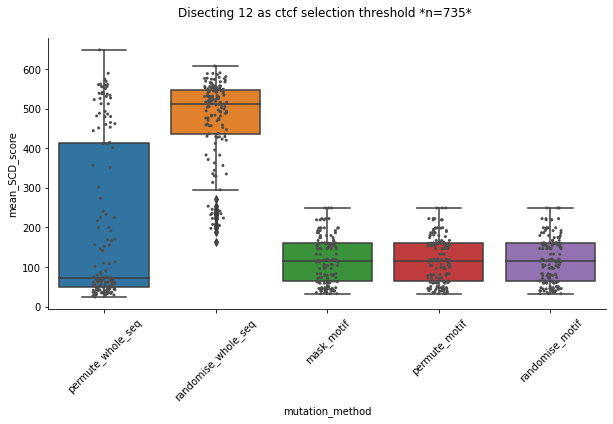

In [7]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different ctcf selection thresholds *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [5,8,12]:
    df_dummy_parameter = dfs.loc[dfs["ctcf_selection_threshold"]==score]
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} as ctcf selection threshold *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# mutation method effect exploration

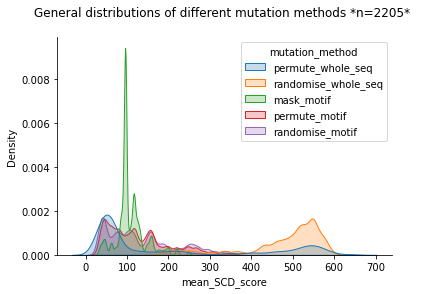

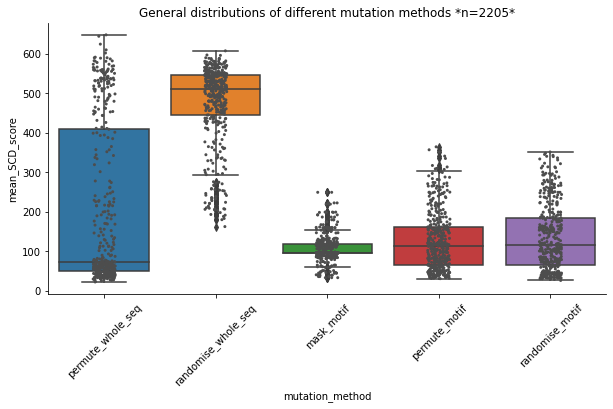

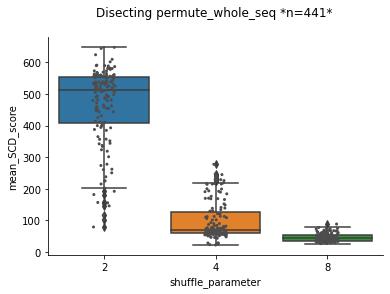

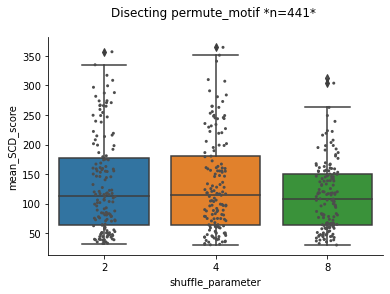

In [8]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
ax.tick_params(axis='x', labelrotation=45)
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
plt.close()

for score in ['permute_whole_seq','permute_motif']: # ,'mask_motif','randomise_motif','randomise_whole_seq','mask_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.boxplot(data=df_dummy_parameter, x='shuffle_parameter', y="mean_SCD_score")
    sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# GC content effect exploration

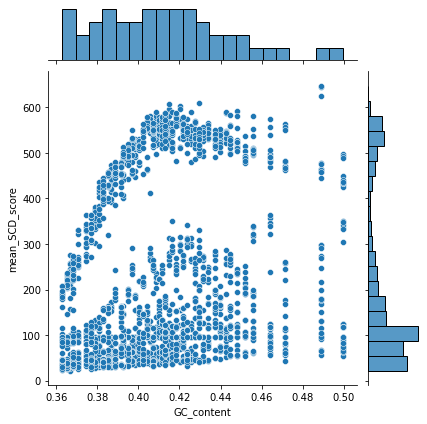

In [9]:
sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content") #, hue="shuffle_parameter"

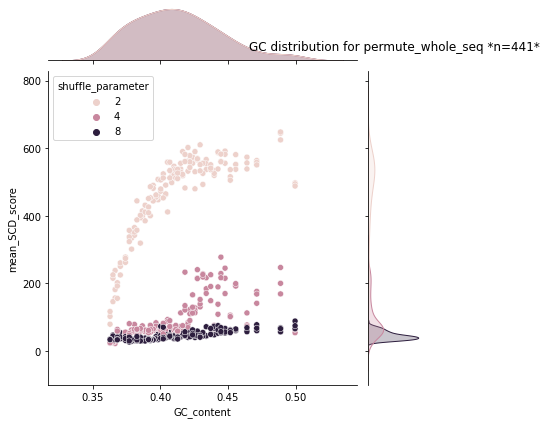

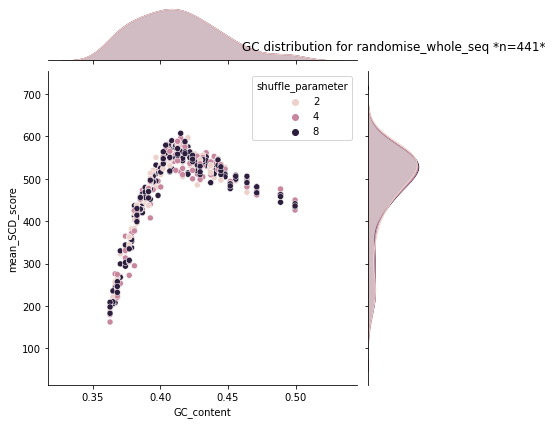

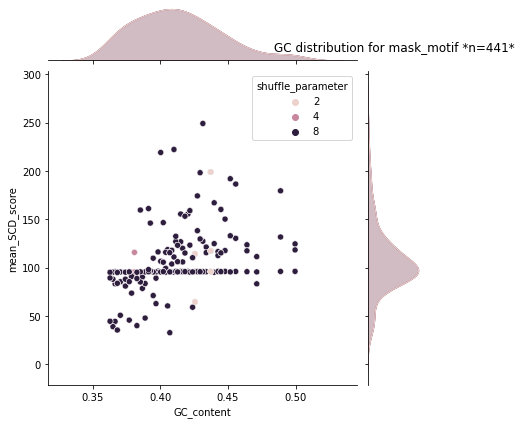

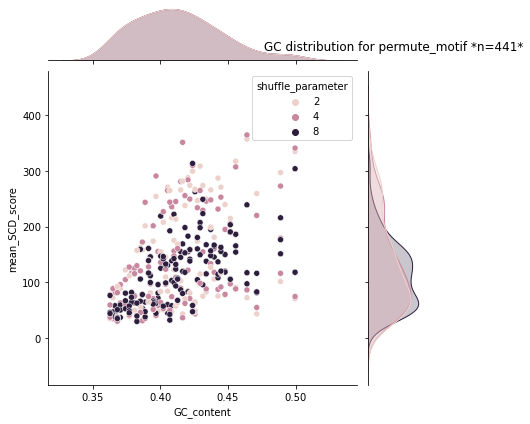

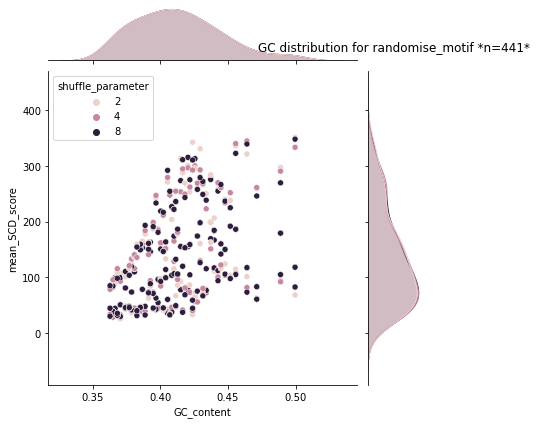

In [10]:
for score in ['permute_whole_seq','randomise_whole_seq','mask_motif','permute_motif','randomise_motif']:
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.jointplot(data=df_dummy_parameter, y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score} *n={df_dummy_parameter.shape[0]}*\n")